In [1]:
import os
import re
import pandas as pd

In [14]:
def count_beds_in_folder(path, start_str="", exclude_list=["ALL"]):
    
    collection = path.split("/")[-1]
    
    if start_str:
        files = [x for x in os.listdir(path) if x.startswith(start_str)]
    else:
        files = os.listdir(path)
        
    data = []

    for file_name in files:
        type_search = re.search('([a-z]*)_DBA2J.bed', file_name, re.IGNORECASE)
        
        sv_type = type_search.group(1)
        sv_count = 0

        if sv_type in exclude_list:
            continue
        
        with open(path + "/" + file_name) as file:
            sv_count = len(file.readlines())

        data.append({'collection': collection, 'type': sv_type, 'count': sv_count})

    return data

,catalog,merged,minimap2-pbsv,minimap2-sniffles,ngmlr-sniffles
type,,,,,
DEL,17539,22189,30346,25923,25298
DUP,70,2197,3475,95,1219
INS,1370,25641,31859,26513,25171
INV,157,0,171,823,821


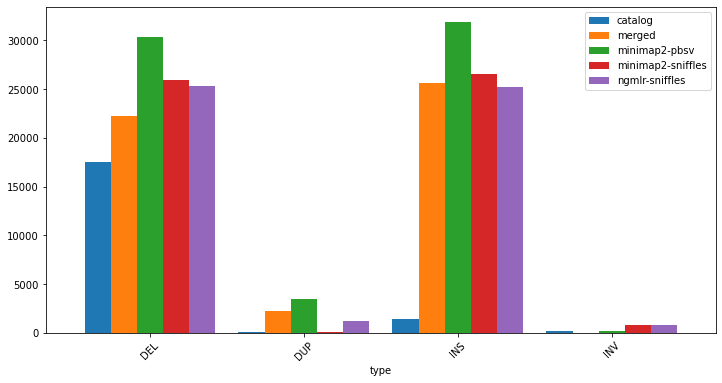

In [20]:
folders = ["../../data/previous-catalog/50/DBA2J/catalog",
          "../../data/DBA2J/bed/50/minimap2-sniffles",
          "../../data/DBA2J/bed/50/ngmlr-sniffles",
          "../../data/DBA2J/bed/50/minimap2-pbsv",
          "../../data/DBA2J/bed/50/merged"]

raw_data = pd.DataFrame()

for folder in folders:
    df = pd.DataFrame(count_beds_in_folder(folder))
    raw_data = raw_data.append(df)

raw_data = raw_data.groupby(["collection", "type"]).sum().unstack("collection").fillna(0).sort_index(key=lambda x: x.map(lambda v: v)).astype('int32')

cols = []
for col in raw_data.columns:
    cols.append(col[1])
raw_data.columns = cols


ax = raw_data.plot.bar(figsize=(12,6), width=0.85, stacked=False, rot=45)
raw_data

,catalog,merged,minimap2-pbsv,minimap2-sniffles,ngmlr-sniffles
type,,,,,
DEL,17540,22924,72613,37335,36147
DUP,70,2213,15692,95,1270
INS,9406,27831,61413,39247,37242
INV,157,0,171,823,821


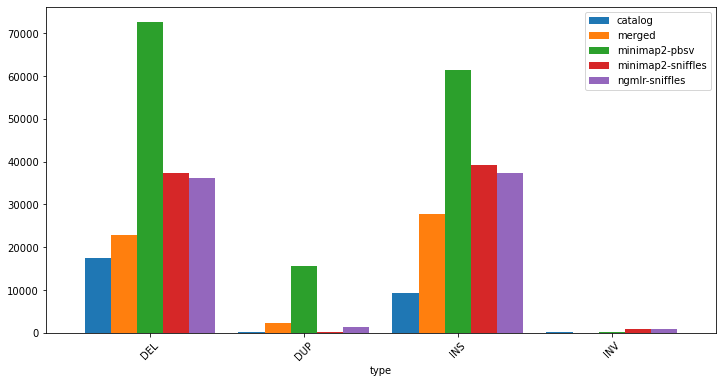

In [17]:
folders = ["../../data/previous-catalog/full/DBA2J/catalog",
          "../../data/DBA2J/bed/full/minimap2-sniffles",
          "../../data/DBA2J/bed/full/ngmlr-sniffles",
          "../../data/DBA2J/bed/full/minimap2-pbsv",
          "../../data/DBA2J/bed/full/merged"]

raw_data = pd.DataFrame()

for folder in folders:
    df = pd.DataFrame(count_beds_in_folder(folder))
    raw_data = raw_data.append(df)

raw_data = raw_data.groupby(["collection", "type"]).sum().unstack("collection").fillna(0).sort_index(key=lambda x: x.map(lambda v: v)).astype('int32')

cols = []
for col in raw_data.columns:
    cols.append(col[1])
raw_data.columns = cols


ax = raw_data.plot.bar(figsize=(12,6), width=0.85, stacked=False, rot=45)
raw_data